<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/comparacion_modelos_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio comparativo: modelo tradicional vs red neuronal profunda

Este cuaderno permite comparar dos enfoques de aprendizaje supervisado sobre el conjunto de datos Iris:

- Modelo tradicional: regresión logística
- Modelo profundo: red neuronal multicapa (MLP)

Se evalúan precisión, tiempo de entrenamiento, complejidad e interpretabilidad.

En este ejercicio se utiliza el conjunto de datos Iris, un clásico en el aprendizaje automático. Contiene 150 observaciones de flores de iris pertenecientes a tres especies (setosa, versicolor y virginica), con cuatro características numéricas por muestra: largo y ancho del sépalo, y largo y ancho del pétalo (en centímetros). Es un conjunto estructurado, de tamaño pequeño y fácilmente interpretable, lo que lo hace ideal para comparar modelos de clasificación supervisada.

In [1]:
# Paso 1: Preparación de entorno y carga del dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar y escalar
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [2]:
# Paso 2: Modelo tradicional - Regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_time = time.time() - start_time

print("Precisión Regresión Logística:", accuracy_score(y_test, y_pred_logreg))
print("Tiempo de entrenamiento:", round(logreg_time, 4), "segundos")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_logreg, target_names=target_names))

Precisión Regresión Logística: 1.0
Tiempo de entrenamiento: 0.0249 segundos
Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Precisión Regresión Logística: 1.0**

La **precisión (accuracy)** es del **100 %**, lo que significa que el modelo clasificó correctamente todas las muestras del conjunto de prueba. Esto es posible en el Iris Dataset porque es un conjunto pequeño, balanceado y bien separado entre clases.


**Reporte de clasificación**

* **Precision**: proporción de predicciones correctas dentro de las clasificadas como esa clase.
* **Recall**: proporción de verdaderos positivos detectados dentro de los ejemplos reales de esa clase.
* **F1-score**: promedio armónico de precisión y recall (también 1.00 en todos los casos).
* **Support**: número de muestras reales de cada clase en el conjunto de prueba.

**Conclusión**

Este resultado evidencia que la **regresión logística es capaz de lograr una clasificación perfecta en Iris**, lo que refuerza la idea de que **no siempre es necesario usar modelos complejos como redes neuronales** para tareas simples o bien definidas. También muestra que los modelos tradicionales pueden ser más interpretables, rápidos y adecuados en ciertos contextos.


In [3]:
# Paso 3: Modelo profundo - Red neuronal MLP
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar etiquetas
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=8, verbose=0)
mlp_time = time.time() - start_time

loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print("Precisión MLP:", round(accuracy, 4))
print("Tiempo de entrenamiento:", round(mlp_time, 4), "segundos")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisión MLP: 1.0
Tiempo de entrenamiento: 11.007 segundos


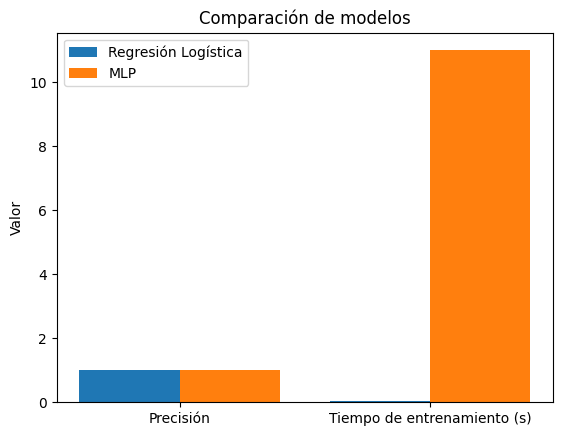

In [4]:
# Paso 4: Comparación gráfica
labels = ['Precisión', 'Tiempo de entrenamiento (s)']
logreg_vals = [accuracy_score(y_test, y_pred_logreg), logreg_time]
mlp_vals = [accuracy, mlp_time]

x = range(len(labels))
plt.bar(x, logreg_vals, width=0.4, label='Regresión Logística', align='center')
plt.bar([p + 0.4 for p in x], mlp_vals, width=0.4, label='MLP', align='center')
plt.xticks([p + 0.2 for p in x], labels)
plt.ylabel('Valor')
plt.title('Comparación de modelos')
plt.legend()
plt.show()

Análisis de la gráfica

    Precisión:
    Ambas barras (azul y naranja) alcanzan aproximadamente
    el mismo valor (~1.0), lo que indica que los dos
    modelos clasificaron correctamente todas las
    muestras del conjunto de prueba.

    Tiempo de entrenamiento:
    Aquí se evidencian diferencias significativas:

        La regresión logística tiene un tiempo de entrenamiento casi nulo (barra azul muy baja).

        El MLP (naranja) requirió más de 10 segundos, lo cual es varios órdenes de magnitud superior.

Este gráfico ilustra que, aunque ambos modelos alcanzan la misma precisión, el modelo tradicional es mucho más eficiente computacionalmente en este contexto. Esto refuerza una lección importante:

    “Modelos más complejos como las redes neuronales
    no siempre son la mejor opción, especialmente cuando
    se trabaja con conjuntos de datos estructurados, pequeños
    y bien definidos como Iris.”

## Conclusión

Este ejercicio demuestra que en conjuntos estructurados pequeños como Iris, un modelo tradicional como la regresión logística puede igualar o superar el rendimiento de un modelo profundo, con menor tiempo de entrenamiento y mayor interpretabilidad.

Se sugiere repetir el ejercicio con un conjunto de datos como Fashion MNIST para observar cómo cambian los resultados a favor de las redes profundas cuando se incrementa la complejidad del problema.